# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
def get_city_weather(city):
    url = "http://api.openweathermap.org/data/2.5/weather?"

    # Build query URL
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    resp = requests.get(query_url)
    if resp.status_code != 200:
        raise ValueError('City weather not found') 
    obj = resp.json()
    return obj
def process_city_weather_data(obj):
    entry = {
        'City': obj['name'],
        'Lat': obj['coord']['lat'],
        'Lng': obj['coord']['lon'],
        'Max Temp': obj['main']['temp_max'],
        'Humidity': obj['main']['humidity'],
        'Cloudiness': obj['clouds']['all'],
        'Wind Speed': obj['wind']['speed'],
        'Country': obj['sys']['country'],
        'Date': obj['main']['temp_max']
    }
    return entry

print('Beginning Data Retrieval')
print('------------------------')
weather = []
for city in cities:
    weather_data = None
    try:
        weather_data = get_city_weather(city)
        print(f"Processing Record {len(weather)} | {city}")
        weather.append(process_city_weather_data(weather_data))
    except:
        print(f"City {city} not found...")

Beginning Data Retrieval
------------------------
City belushya guba not found...
Processing Record 0 | bengkulu
Processing Record 1 | qaanaaq
Processing Record 2 | la rioja
Processing Record 3 | narsaq
Processing Record 4 | korla
Processing Record 5 | jamestown
Processing Record 6 | itupiranga
Processing Record 7 | mataura
Processing Record 8 | port-gentil
Processing Record 9 | atuona
Processing Record 10 | ilulissat
Processing Record 11 | agua branca
Processing Record 12 | imeni poliny osipenko
Processing Record 13 | ponta do sol
Processing Record 14 | avarua
Processing Record 15 | acarau
Processing Record 16 | ushuaia
Processing Record 17 | yeysk
Processing Record 18 | chuy
Processing Record 19 | busselton
Processing Record 20 | kapaa
Processing Record 21 | mar del plata
Processing Record 22 | arraial do cabo
Processing Record 23 | chicama
City taolanaro not found...
Processing Record 24 | yellowknife
Processing Record 25 | venice
Processing Record 26 | saint-philippe
Processing Rec

Processing Record 228 | hermon
Processing Record 229 | boffa
Processing Record 230 | saint george
Processing Record 231 | straumen
City mahadday weyne not found...
Processing Record 232 | banjar
Processing Record 233 | xinqing
Processing Record 234 | zuwarah
Processing Record 235 | mangrol
Processing Record 236 | tallahassee
Processing Record 237 | zambezi
Processing Record 238 | amahai
Processing Record 239 | lasa
Processing Record 240 | quarai
City kazalinsk not found...
Processing Record 241 | souillac
Processing Record 242 | ossora
Processing Record 243 | cherskiy
Processing Record 244 | anloga
Processing Record 245 | brae
City marcona not found...
Processing Record 246 | waipawa
Processing Record 247 | mao
City barentsburg not found...
City sentyabrskiy not found...
Processing Record 248 | manhattan
Processing Record 249 | akdepe
Processing Record 250 | eureka
City ngukurr not found...
Processing Record 251 | sherlovaya gora
Processing Record 252 | petropavlovsk-kamchatskiy
Proces

Processing Record 452 | fort pierce
Processing Record 453 | salinopolis
Processing Record 454 | port blair
Processing Record 455 | erenhot
Processing Record 456 | coari
Processing Record 457 | sao filipe
Processing Record 458 | avera
City puerto cortes not found...
Processing Record 459 | sao jose da coroa grande
City ruatoria not found...
Processing Record 460 | sagaing
Processing Record 461 | leningradskiy
Processing Record 462 | kalmunai
Processing Record 463 | fare
Processing Record 464 | kalanchak
City saleaula not found...
Processing Record 465 | cockburn town
City rawannawi not found...
Processing Record 466 | shakiso
Processing Record 467 | gebre guracha
Processing Record 468 | mehamn
Processing Record 469 | mlonggo
City palabuhanratu not found...
Processing Record 470 | farah
Processing Record 471 | kahului
Processing Record 472 | golkoy
Processing Record 473 | puerto escondido
Processing Record 474 | khash
Processing Record 475 | asfi
Processing Record 476 | arlit
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Convert API parsed data to DataFrame
weather_df = pd.DataFrame(weather)
weather_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0  Bengkulu  -3.8004  102.2655    301.94        66         100        1.20   
1   Qaanaaq  77.4840  -69.3632    251.32        97         100        1.07   
2  La Rioja  42.2500   -2.5000    278.71        70          20        5.14   
3    Narsaq  60.9167  -46.0500    273.15        93          75        5.14   
4     Korla  41.7597   86.1469    277.81        46           6        3.11   

  Country    Date  
0      ID  301.94  
1      GL  251.32  
2      ES  278.71  
3      GL  273.15  
4      CN  277.81

In [5]:
# Export CSV
weather_df.to_csv(os.path.join('.', 'data', 'cities.csv'), encoding='utf8', index=False)

In [6]:
weather_stats = weather_df.aggregate('describe')
weather_stats

Lat         Lng    Max Temp    Humidity  Cloudiness  Wind Speed  \
count  550.000000  550.000000  550.000000  550.000000  550.000000  550.000000   
mean    21.318862   18.855332  284.772236   72.772727   51.512727    3.736600   
std     33.413765   89.798190   15.169162   20.454694   41.453980    2.757035   
min    -54.800000 -179.166700  237.230000    1.000000    0.000000    0.130000   
25%     -5.867900  -58.441975  275.607500   64.000000    1.000000    1.667500   
50%     27.099900   24.474050  288.150000   77.000000   63.000000    3.100000   
75%     48.604100  100.331875  297.205000   88.000000   95.000000    4.920000   
max     78.218600  179.316700  309.150000  100.000000  100.000000   19.550000   

             Date  
count  550.000000  
mean   284.772236  
std     15.169162  
min    237.230000  
25%    275.607500  
50%    288.150000  
75%    297.205000  
max    309.150000

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
high_humidity_df = weather_df.loc[weather_df['Humidity'] > 100, :]
total_cities_with_high_humidity = len(high_humidity_df)
cities_with_humidity_indices = high_humidity_df.index


In [8]:
#  Get the indices of cities that have humidity over 100%.
cities_with_humidity_indices

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
if total_cities_with_high_humidity > 0:
    clean_city_data = weather_df.drop(index=cities_with_humidity_indices, inplace=False)
else:
    clean_city_data = weather_df.copy()
clean_city_data.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0  Bengkulu  -3.8004  102.2655    301.94        66         100        1.20   
1   Qaanaaq  77.4840  -69.3632    251.32        97         100        1.07   
2  La Rioja  42.2500   -2.5000    278.71        70          20        5.14   
3    Narsaq  60.9167  -46.0500    273.15        93          75        5.14   
4     Korla  41.7597   86.1469    277.81        46           6        3.11   

  Country    Date  
0      ID  301.94  
1      GL  251.32  
2      ES  278.71  
3      GL  273.15  
4      CN  277.81

In [10]:
clean_city_data.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

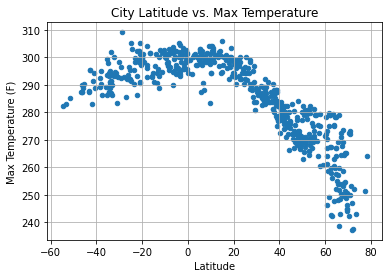

In [11]:
title='City Latitude vs. Max Temperature'
clean_city_data \
    .rename(columns={'Lat': 'Latitude', 'Max Temp': 'Max Temperature (F)'}) \
    .plot('Latitude', 'Max Temperature (F)', kind='scatter', title=title, grid=True)
plt.savefig(os.path.join('.', 'data', title.replace(' ', '_') + '.png'))

#### Analysis
* Temperature around the latitude 0 (earth's equator) is around 300K or 26 Celsius
* Temperature decreases as go above the earth's equator
* The relationship between the latitude and temperature is non-linear

## Latitude vs. Humidity Plot

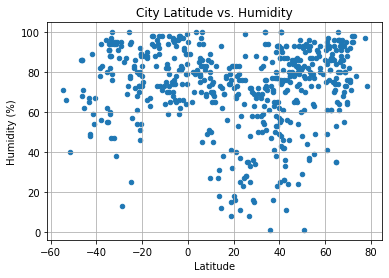

In [12]:
title = 'City Latitude vs. Humidity'
clean_city_data \
    .rename(columns={'Lat': 'Latitude', 'Humidity': 'Humidity (%)'}) \
    .plot('Latitude', 'Humidity (%)', kind='scatter', title=title, grid=True)
plt.savefig(os.path.join('.', 'data', title.replace(' ', '_') + '.png'))

#### Analysis
* this scatter plot resembles the shape of the different continents - maybe we could look at the relationship between the humidity and longitude to have a better understanding of how humidity relates to lat and lng

## Latitude vs. Cloudiness Plot

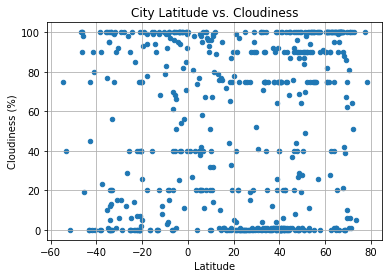

In [25]:
title = 'City Latitude vs. Cloudiness'
clean_city_data \
    .rename(columns={'Lat': 'Latitude', 'Cloudiness': 'Cloudiness (%)'}) \
    .plot('Latitude', 'Cloudiness (%)', kind='scatter', title=title, grid=True)
plt.savefig(os.path.join('.', 'data', title.replace(' ', '_') + '.png'))

#### Analysis
* no logical explanation...

## Latitude vs. Wind Speed Plot

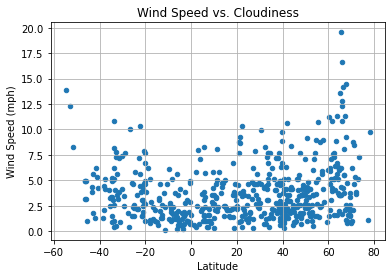

In [14]:
title = 'Wind Speed vs. Cloudiness'
clean_city_data \
    .rename(columns={'Lat': 'Latitude', 'Wind Speed': 'Wind Speed (mph)'}) \
    .plot('Latitude', 'Wind Speed (mph)', kind='scatter', title=title, grid=True)
plt.savefig(os.path.join('.', 'data', title.replace(' ', '_') + '.png'))

#### Analysis
* Higher wind speeds are more extreme as you move away from the equator

## Linear Regression

In [15]:
def plot_regression(x_values, y_values, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    print((slope, intercept, rvalue, pvalue, stderr))
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq, (min(x_values),min(y_values)), fontsize=15,color="red")
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.title(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.savefig(os.path.join('.', 'data', title.replace(' ', '_')))
    plt.show()
south_data = clean_city_data.loc[clean_city_data['Lat'] < 0, :]
north_data = clean_city_data.loc[clean_city_data['Lat'] >= 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

(-0.7056306950903819, 308.10269175004146, -0.8971293285100658, 1.5410833475390881e-136, 0.017848308386955117)
The r-squared is: 0.8048410320729215


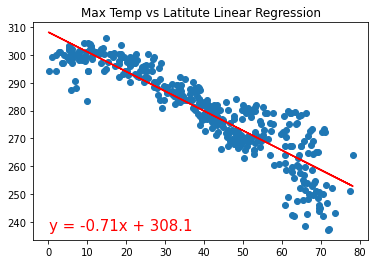

In [16]:
x_values = north_data['Lat']
y_values = north_data['Max Temp']
title = 'Max Temp vs Latitute Linear Regression'
plot_regression(x_values, y_values, title)

#### Analysis
* As noted before, there is a high correlation between Max Temperature and Latitude

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

(0.2442518874306378, 300.8736931692843, 0.6228246942571636, 1.5511044501652373e-19, 0.023742218564254354)
The r-squared is: 0.3879105997765293


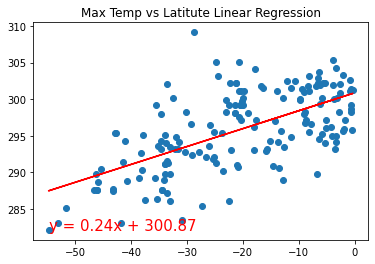

In [17]:
x_values = south_data['Lat']
y_values = south_data['Max Temp']
title = 'Max Temp vs Latitute Linear Regression'
plot_regression(x_values, y_values, title)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

(0.2575409551436424, 60.01752411196651, 0.23347822618384018, 4.1018511268432065e-06, 0.05509450730403674)
The r-squared is: 0.05451208210195243


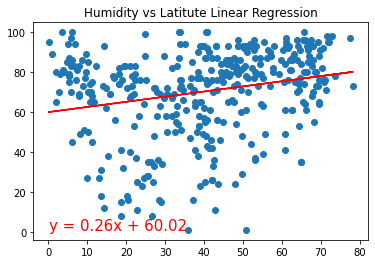

100


In [18]:
x_values = north_data['Lat']
y_values = north_data['Humidity']
title = 'Humidity vs Latitute Linear Regression'
plot_regression(x_values, y_values, title)
print(max(y_values))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

(0.24681885504512574, 83.4372786241375, 0.21672579646672738, 0.004651264403176682, 0.08603254293425786)
The r-squared is: 0.04697007085413734


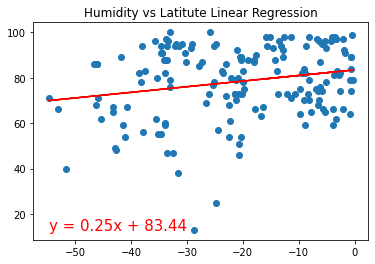

In [19]:
x_values = south_data['Lat']
y_values = south_data['Humidity']
title = 'Humidity vs Latitute Linear Regression'
plot_regression(x_values, y_values, title)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

(0.4394785572836136, 33.46554354454559, 0.2090121798873817, 3.924954994265999e-05, 0.10562013701287272)
The r-squared is: 0.0436860913412752


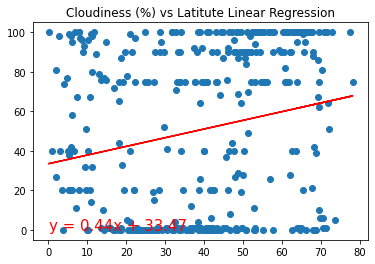

In [20]:
x_values = north_data['Lat']
y_values = north_data['Cloudiness']
title = 'Cloudiness (%) vs Latitute Linear Regression'
plot_regression(x_values, y_values, title)

#### Analysis
* This regression offers little to no value since the correlation is very small
* It is difficult to determine any meaningful information from the cloudiness vs latitude

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

(0.5671804390829576, 64.3615607839758, 0.18993666563402808, 0.01338307816353485, 0.226869236909379)
The r-squared is: 0.03607593695217259


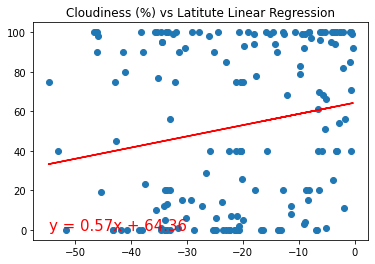

In [21]:
x_values = south_data['Lat']
y_values = south_data['Cloudiness']
title = 'Cloudiness (%) vs Latitute Linear Regression'
plot_regression(x_values, y_values, title)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

(0.03851846498387894, 2.3905733785419754, 0.26555656546759, 1.431300734473543e-07, 0.0071831060852745685)
The r-squared is: 0.0705202894629424


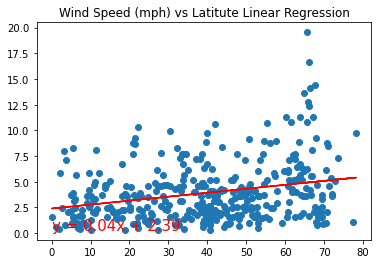

In [22]:
x_values = north_data['Lat']
y_values = north_data['Wind Speed']
title = 'Wind Speed (mph) vs Latitute Linear Regression'
plot_regression(x_values, y_values, title)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

(-0.08303395948831647, 1.5724877037496712, -0.469960932255662, 1.1454381287128165e-10, 0.01206820260319043)
The r-squared is: 0.22086327784661092


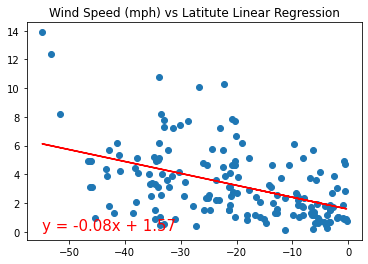

In [23]:
x_values = south_data['Lat']
y_values = south_data['Wind Speed']
title = 'Wind Speed (mph) vs Latitute Linear Regression'
plot_regression(x_values, y_values, title)